# Part 1 - Analyzing Wildfire Activities in Australia

### Objectives

1. Use visualization libraries such as Matplotlib, Pandas, Seaborn anf Folium to create informative plots and charts.

In [3]:
import pandas as pd  #for managing data
import numpy as np   # for mathematical operations
import seaborn as sns # for visualizing the data
import matplotlib as mpl #for additional plotting tools
import matplotlib.pyplot as plt
import folium
%matplotlib inline

## Dataset

#### Historical Wildfires

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

**Variables:**

1. **Region** - the 7 regions
2. **Date** - in UTC and provide the data for 24 hours ahead
3. **Estimated_fire_area:** - Daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for each region in km2
4. **Mean_estimated_fire_brightness**: - daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegitation ires with a confidence level of >75% in kelvin.
5. **Mean_estimated_fire_radiactive_power:** - daily mean of estimated radiative power for persumed vegetation fires with a confidence level >75% for a given region in megawatts.
6. **Mean_confidence:** - daily mean of confidence for presumed vegetation fires with a confidence level >75%.
7. **Std_confidence**: - standard deviation of estimated fire radiative power in megawatts.
8. **Var_confidence:** - Variance of estimated fire radiative power in megawatts.
9. **Count** - daily no of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region.
10. **Replaced:** - Indicated with a Y whether the data has been replaced with standard quality data when they are avilable (usually with a 2-3 month lag). Replaced dta has as slightly higher quality in terms of locations.

In [4]:
url = ('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv')
df = pd.read_csv(url)
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [5]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [6]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

Notice the type of 'Date' is object, let's convert it to 'datetime' type and also let's extract 'Year' and 'Month' from date and include in the dataframe as separate columns

In [7]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [8]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'Year', 'Month'],
      dtype='object')

## Task 1.1 - Let's try to understand the change in average estimated fire area over time (Use Pandas to Plot)

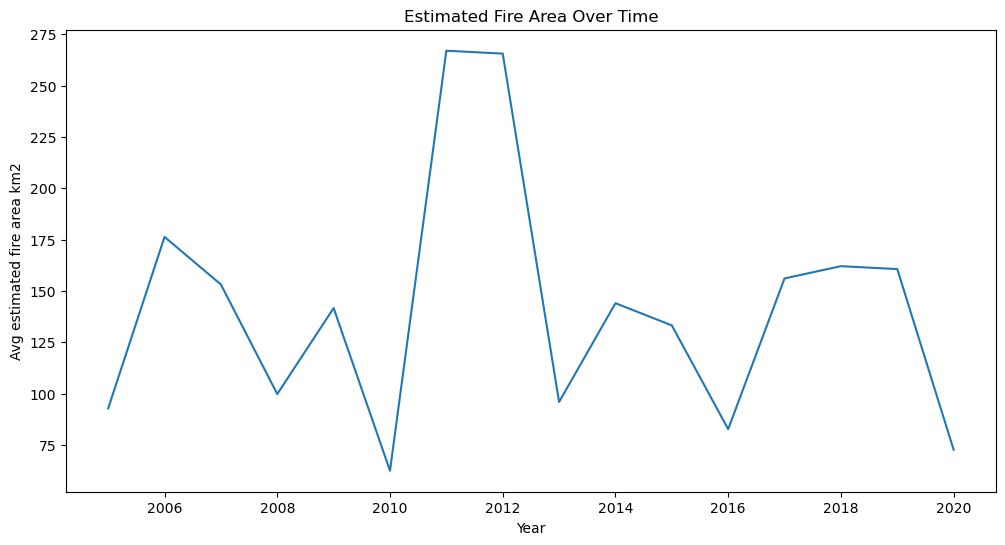

In [9]:
##Hint - we will be required to group the year for 'Estimated_fire_area' (taking its mean), then use df.plot() on it to create a line graph
df_new = df.groupby('Year')['Estimated_fire_area'].mean()

plt.figure(figsize = (12,6))
df_new.plot(x = df_new.index, y = df_new.values)
plt.xlabel('Year')
plt.ylabel('Avg estimated fire area km2')
plt.title('Estimated Fire Area Over Time')
plt.show()

## Task 1.2 - We can notice the peak in the plot between 2010 to 2013. Let's narrow down our findings, by plotting the estimated fire area for year grouped together with month

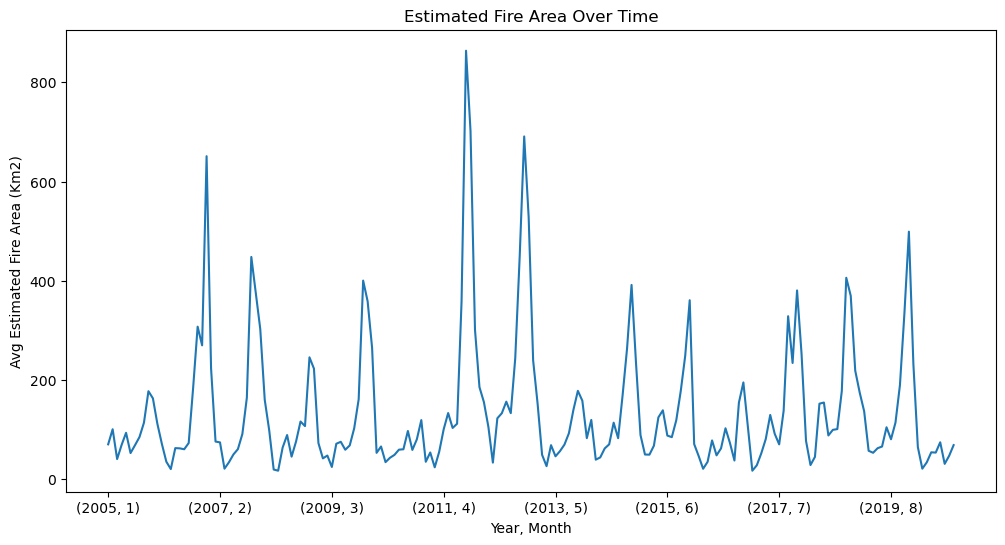

In [10]:
df_new = df.groupby(['Year', 'Month'])['Estimated_fire_area'].mean()

plt.figure(figsize=(12,6))
df_new.plot(x = df_new.index, y = df_new.values)
plt.xlabel('Year, Month')
plt.ylabel('Avg Estimated Fire Area (Km2)')
plt.title('Estimated Fire Area Over Time')

plt.show()
           

This plot represents that the estimated fire area was on its peak after 2100, April and before 2012. We can verify on google news, this was the time of maximum wildfire hit in Australia.

## Task 1.3 - Let's have an insight on the distribution of mean estimated fire brightness across the regions use the functionality of seaborn to develop a barplot

Befor starting with the plot, why not know the 'regions' mentioned in the dataset? Let's use `unique()` to identify the regions in the dataset (apply it on series only)

In [11]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

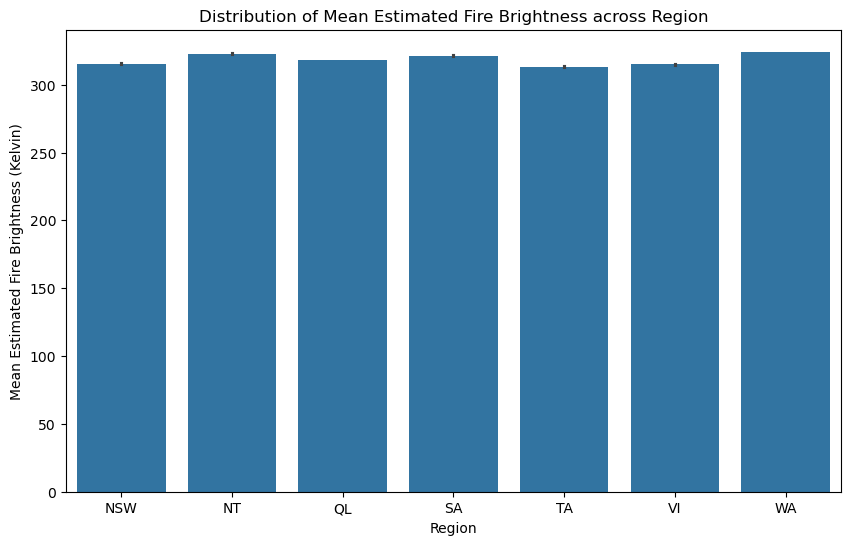

In [12]:
plt.figure(figsize=(10,6))

sns.barplot(data = df, x = 'Region', y = 'Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Region')

plt.show()
           

## Task 1.4 - Let's find the portion of count of pixels for presumed vegetation fires vary across regions, let's develop a pie chart for this.

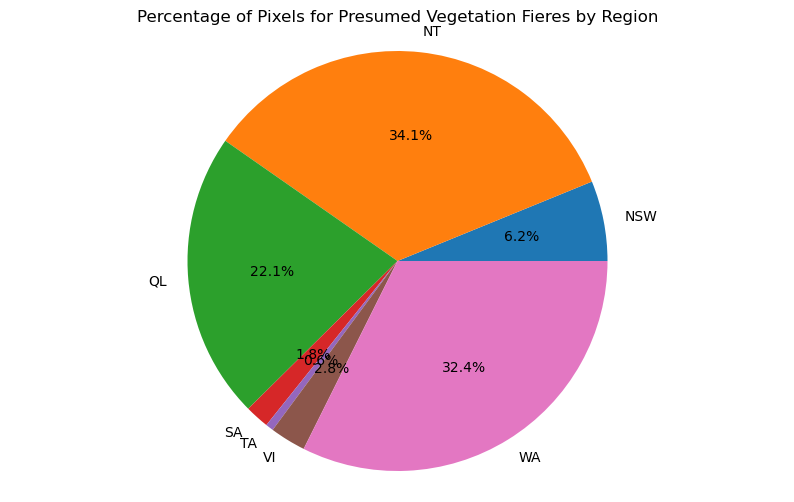

In [13]:
plt.figure(figsize = (10,6))
region_counts = df.groupby('Region')['Count'].sum()

plt.pie(region_counts, labels = region_counts.index, autopct = '%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fieres by Region')
plt.axis('equal')
plt.show()

## Task 1.5 - See the percentage on the pie chart is not looking good as it is overlaped for region SA, TA, VI

Let's remove `autopct` from pie function and pass the following to plt.legend() after plt.title() `[(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)]`

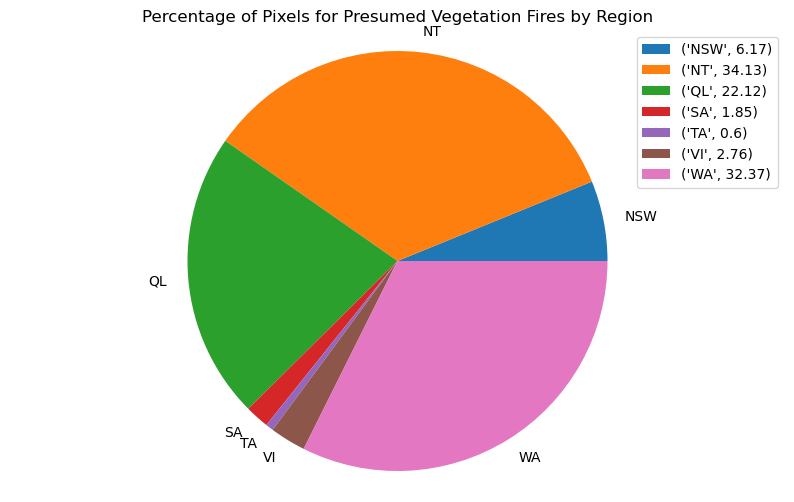

In [14]:
plt.figure(figsize=(10,6))
region_counts = df.groupby('Region')['Count'].sum()

plt.pie(region_counts, labels = region_counts.index)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)])

plt.show()

## Tsk 1.6 - Let's try to develop a Histogram of the mean estimated fire brightness Using Matplotlib to create the histogram

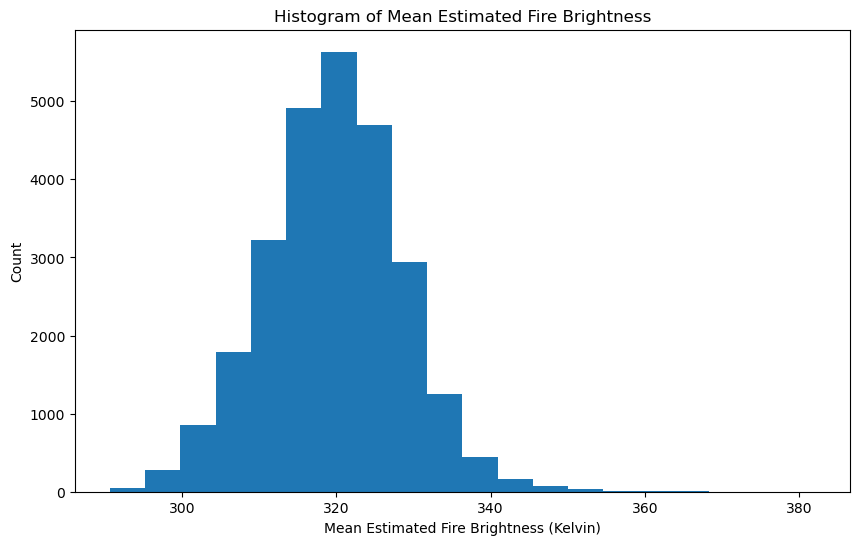

In [15]:
plt.figure(figsize = (10,6))

plt.hist(x = df['Mean_estimated_fire_brightness'], bins = 20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')

plt.show()

## Task 1.7 - What if we needd to understand the distribution of estimated fire brightness across regions? Let' use the functionality of seaborn and pass the region as hue.

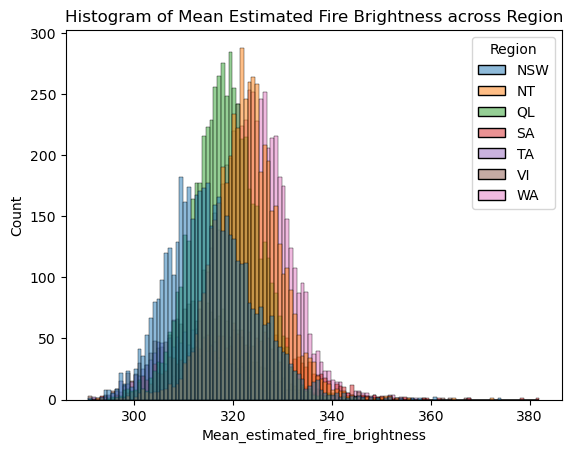

In [16]:
#creating a histogram to visualiuze the distribution of mean estimated fire brightness across regions using seaborn
#adding hue = 'Region' to differentiate the distribution across regions
sns.histplot(data = df, x = 'Mean_estimated_fire_brightness', hue = 'Region')
plt.title('Histogram of Mean Estimated Fire Brightness across Region')
plt.show()


## Task 1.8 - Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?

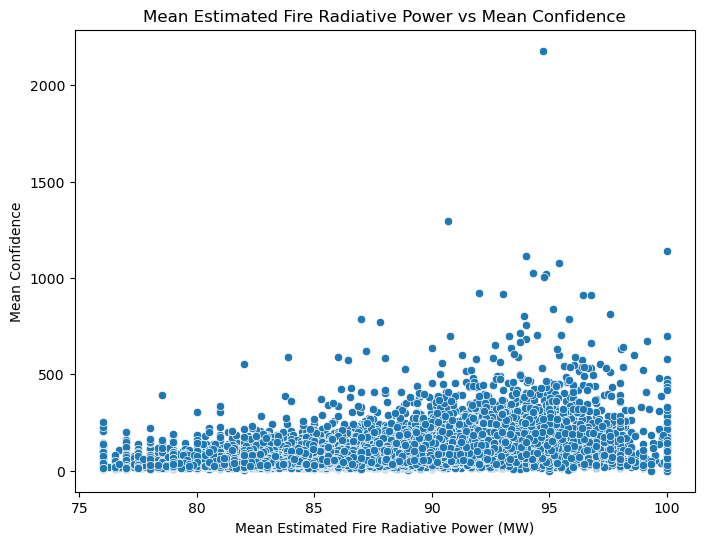

In [17]:
plt.figure(figsize = (8,6))

sns.scatterplot(data = df, x = 'Mean_confidence', y = 'Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs Mean Confidence')

plt.show()

## Task 1.9 - Let's mark these 7 regions on the map of Australia using Folium.

For australia use [-25, 135] as location to create the map

In [18]:
#given lat, and long values for the 7 regions
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [19]:
import folium
aus_reg = folium.map.FeatureGroup()

Aus_map = folium.Map(location = [-25,135], zoom_start = 4)

for Lat, Lon, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [Lat, Lon],
            popup = lab,
            radius = 5,
            color = 'red', fill = True, fill_color = 'blue', fill_opacity = 0.6
        )
    )

Aus_map.add_child(aus_reg)